In [1]:
from world import World, Nation, Pathogen
from matplotlib import pyplot as plt
import seaborn as sns

pop_size = 1000
sociabilities = [2, 5, 10, 20, 50]
resistance = 0
mortality_rate = 0.1
contagiousnesses = [0.02, 0.2, 0.5]
incubation_period = 3
disease_length = 10
latent_period = 2

num_days = 90

def inc_days(community, date):
    date += 1
    community.mingle(date)
    return date


In [2]:
num_sociabilities = len(sociabilities)
num_contagiousnesses = len(contagiousnesses)


for i in range(len(sociabilities)):
    legend = False
    sociability = sociabilities[i]
    for j in range(len(contagiousnesses)):
        contagiousness = contagiousnesses[j]
        virus = Pathogen(
            contagiousness,
            incubation_period,
            disease_length,
            latent_period,
            mortality_rate=mortality_rate
        )
        
        community = Nation(
            pop_size=pop_size,
            avg_compliance=1,
            avg_age=1,
            sociability=sociability,
            base_resistance=resistance,
            max_age=1
        )
        scenario = World(
            max_age=None,
            base_resistance=None
        )
        nation_name = '{:0.2%}'.format(contagiousness)
        scenario.init_nation(nation_name, nation=community)
        scenario.initiate_infection(virus)
        scenario.new_day(num_days)
        log = scenario.daily_log
        log['contagiousness'] = nation_name
        log['sociability'] = sociability
        if i == 0 and j == 0:
            total_log = log
        else:
            total_log = total_log.append(log)
        

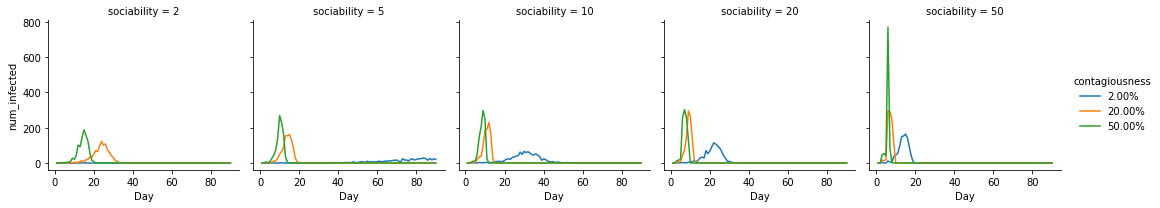

In [3]:
total_log['cumu_died'] = total_log.groupby(['Nation', 'contagiousness', 'sociability'])['num_died'].cumsum()

grid = sns.FacetGrid(total_log, col='sociability', hue='contagiousness')
grid = grid.map(sns.lineplot, 'Day', 'num_infected').add_legend()
plt.show()

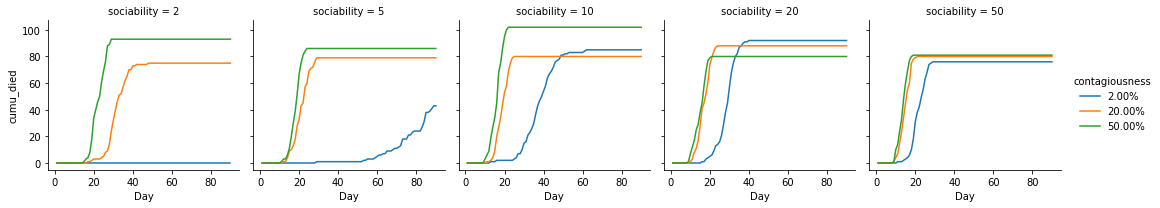

In [4]:
grid = sns.FacetGrid(total_log, col='sociability', hue='contagiousness')
grid = grid.map(sns.lineplot, 'Day', 'cumu_died').add_legend()
plt.show()